In [68]:
from tied import TIEDModel
from transformers import AutoTokenizer
import torch
import matplotlib.pyplot as plt

In [69]:
# Load model and tokenizer
name = "models/checkpoint-200"
model = TIEDModel.from_pretrained(name).to("cuda")
tokenizer = AutoTokenizer.from_pretrained(name)

In [ ]:
def generate_image(model, prompt, device="cuda"):

    inputs = tokenizer(prompt, return_tensors="pt").to(device)
    input_ids = inputs.input_ids
    attention_mask = inputs.attention_mask

    generated_latents = model(input_ids=input_ids, attention_mask=attention_mask).decoded_latents
    
    print("Generated Latents Shape:", generated_latents.shape)

    last_latent = generated_latents[:, -1]  # [B, C, H, W]
    print("Last Latent Shape:", last_latent.shape)

    decoded = model.vae.decode(last_latent).sample  # [B, 3, H, W]
    decoded = (decoded / 2 + 0.5).clamp(0, 1)

    img_np = decoded.squeeze().permute(1, 2, 0).detach().cpu().numpy()

    plt.imshow(img_np)
    plt.axis('off')
    plt.savefig("output_image.png", bbox_inches='tight', pad_inches=0)
    plt.show()

    return generated_latents


Generated Latents Shape: torch.Size([1, 1, 4, 8, 8])
Last Latent Shape: torch.Size([1, 4, 8, 8])


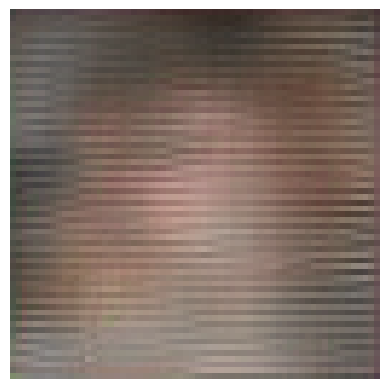

In [72]:

prompt = """The image shows a woman with a white wedding dress"""

generated_latents = generate_image(prompt)

In [197]:
generated_latents.shape  # [B, T, C, H, W]

torch.Size([1, 1, 4, 8, 8])

In [57]:
generated_latents[:,0, :1, :1, :4]

tensor([[[[ 1.4047e+00,  2.8228e-03, -4.3609e+00, -6.6121e+00]]]],
       device='cuda:0', grad_fn=<SliceBackward0>)

In [198]:
generated_latents[:,1, :1, :1, :4]

IndexError: index 1 is out of bounds for dimension 1 with size 1